In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('train.csv')
df=pd.DataFrame(train)
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
np.sum(df.isnull())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
df=df.drop(['id','location'],axis=1)

In [6]:
df

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,Police investigating after an e-bike collided ...,1


In [7]:
len(df.keyword.unique())

222

<AxesSubplot:xlabel='keyword', ylabel='count'>

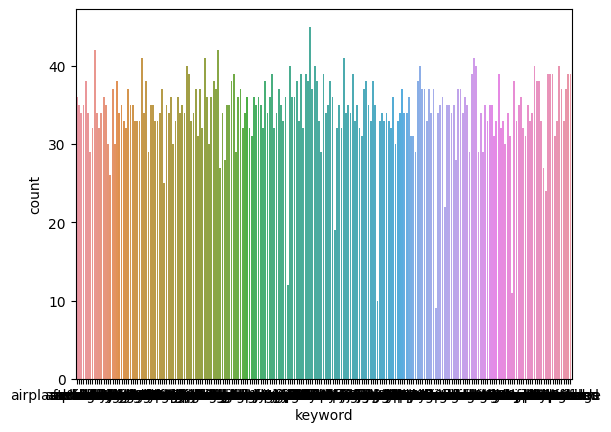

In [8]:
sns.countplot(x='keyword',data=df)

In [9]:
import random as rn

In [10]:
rn.randint(1,5)

3

In [11]:
np.where(df['keyword'].isnull() == True)[0][3]

3

In [12]:
for i in np.where(df['keyword'].isnull() == True)[0]:
    df['keyword'][i]=df['keyword'][rn.randint(0,len(df.keyword)-1)]


C:\Users\Sparsh\AppData\Local\Temp\ipykernel_15056\2688394112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keyword'][i]=df['keyword'][rn.randint(0,len(df.keyword)-1)]


In [13]:
np.sum(df.isnull())

keyword    0
text       0
target     0
dtype: int64

In [14]:
df['keyword'].value_counts()

fatalities               46
armageddon               43
deluge                   42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

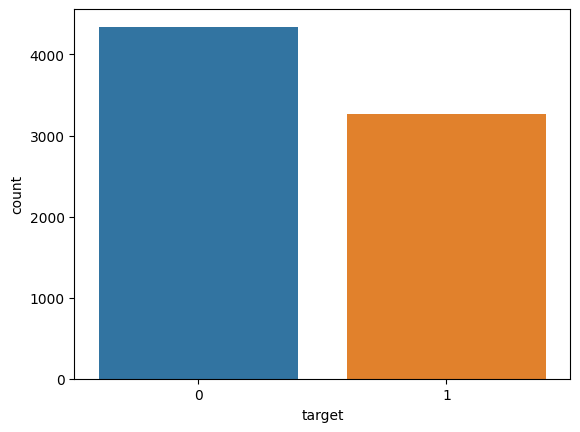

In [15]:
sns.countplot(x='target',data=df)

In [16]:
y=df['target']

In [17]:
df=df.drop('target',axis=1)

In [18]:
df

,keyword,text
0,ablaze,Our Deeds are the Reason of this #earthquake M...
1,fatality,Forest fire near La Ronge Sask. Canada
2,crush,All residents asked to 'shelter in place' are ...
3,body%20bagging,"13,000 people receive #wildfires evacuation or..."
4,explode,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,mass%20murder,Two giant cranes holding a bridge collapse int...
7609,sirens,@aria_ahrary @TheTawniest The out of control w...
7610,rainstorm,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,obliteration,Police investigating after an e-bike collided ...


In [21]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(train)):
    review=re.sub('[^a-zA-Z]',' ',df['text'][i])
    review=review.lower()
    review=review.split()

    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area',
 'three peopl die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood',
 'rain flood florida tampabay tampa day lost count',
 'flood bago myanmar arriv bago',
 'damag school bu multi car crash break',
 'man',
 'love fruit',
 'summer love',
 'car fast',
 'goooooooaaaaaal',
 'ridicul',
 'london cool',
 'love ski',
 'wonder day',
 'looooool',
 'way eat shit',
 'nyc last week',
 'love girlfriend',
 'cooool',
 'like pasta',
 '

Data transformation

In [63]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [64]:
X=cv.fit_transform(corpus).toarray()

In [68]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

divide dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=0)


model fitting

In [65]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,Y_train)

BernoulliNB()

MOdel performence

In [66]:
ypred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,ypred)
cm

array([[1176,  162],
       [ 290,  656]], dtype=int64)

In [67]:
accuracy_score(Y_test,ypred)

0.8021015761821366

NOW TESTING MODEL ON TEST DATA

In [31]:
test=pd.read_csv('test.csv')
dft=pd.DataFrame(test)
df

,keyword,text
0,ablaze,Our Deeds are the Reason of this #earthquake M...
1,fatality,Forest fire near La Ronge Sask. Canada
2,crush,All residents asked to 'shelter in place' are ...
3,body%20bagging,"13,000 people receive #wildfires evacuation or..."
4,explode,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,mass%20murder,Two giant cranes holding a bridge collapse int...
7609,sirens,@aria_ahrary @TheTawniest The out of control w...
7610,rainstorm,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,obliteration,Police investigating after an e-bike collided ...


In [32]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(test)):
    review=re.sub('[^a-zA-Z]',' ',dft['text'][i])
    review=review.lower()
    review=review.split()

    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
Xt=cv.fit_transform(corpus).toarray()
ypred=classifier.predict(Xt)


In [58]:
y2=pd.DataFrame(ypred)

In [59]:
neww=pd.concat([dft['id'],y2],axis=1)

In [60]:
neww.to_excel('results.xlsx',sheet_name='new_sheet_name')